<a href="https://colab.research.google.com/github/freddy120/ML1_CEIA_TP/blob/main/TP_CEIA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TP final - Aprendizaje maquina 1 

Nombre: Freddy Rodrigo Mendoza Ticona
email: frmendozat@uni.pe

dataset: https://www.kaggle.com/ruthgn/bank-marketing-data-set

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

root_path = '/content/drive/MyDrive/ML1_CEIA_TP/'

Mounted at /content/drive


In [2]:
!pip install funpymodeling
!pip install tensorflow
!pip install seaborn --upgrade

     |████████████████████████████████| 215 kB 5.5 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
     |████████████████████████████████| 292 kB 5.0 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
funpymodeling 0.1.7 requires seaborn<0.11.0,>=0.10.1, but you have seaborn 0.11.2 which is incompatible.


In [80]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
pd.set_option("display.max_columns", None)
print(sns.__version__)

# sklearn
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
# Partición de train-test set
from sklearn.model_selection import train_test_split
from scipy import stats

from funpymodeling.exploratory import status, freq_tbl, profiling_num

import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model


0.11.2


## Dataset
### Input variables:

bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')
10. dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

other attributes:
11. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
12. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
13. previous: number of contacts performed before this campaign and for this client (numeric)
14. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes:
15. emp.var.rate: employment variation rate - quarterly indicator (numeric)
16. cons.price.idx: consumer price index - monthly indicator (numeric)
17. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
18. euribor3m: euribor 3 month rate - daily indicator (numeric)
19. nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

20. y - has the client subscribed a term deposit? (binary: 'yes','no')

In [81]:
bank_df = pd.read_csv(root_path + 'bank-direct-marketing-campaigns.csv')

In [82]:
print('Dimension dataset: ', bank_df.shape)
print('\nColumnas con variables numéricas: ')
numeric_df = bank_df.select_dtypes(exclude=['category', object]).columns
print(numeric_df.values)
print('\nColumnas con variables categóricas: ')
categorical_df = bank_df.select_dtypes(include=['category', object]).columns
print(categorical_df.values)

Dimension dataset:  (41188, 20)

Columnas con variables numéricas: 
['age' 'campaign' 'pdays' 'previous' 'emp.var.rate' 'cons.price.idx'
 'cons.conf.idx' 'euribor3m' 'nr.employed']

Columnas con variables categóricas: 
['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome' 'y']


## Analisis exploratorio

In [7]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
bank_df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [22]:
status(bank_df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.0,0,0.000000,78,int64
1,job,0,0.0,0,0.000000,12,object
2,marital,0,0.0,0,0.000000,4,object
3,education,0,0.0,0,0.000000,8,object
4,default,0,0.0,0,0.000000,3,object
5,housing,0,0.0,0,0.000000,3,object
6,loan,0,0.0,0,0.000000,3,object
7,contact,0,0.0,0,0.000000,2,object
8,month,0,0.0,0,0.000000,10,object
9,day_of_week,0,0.0,0,0.000000,5,object


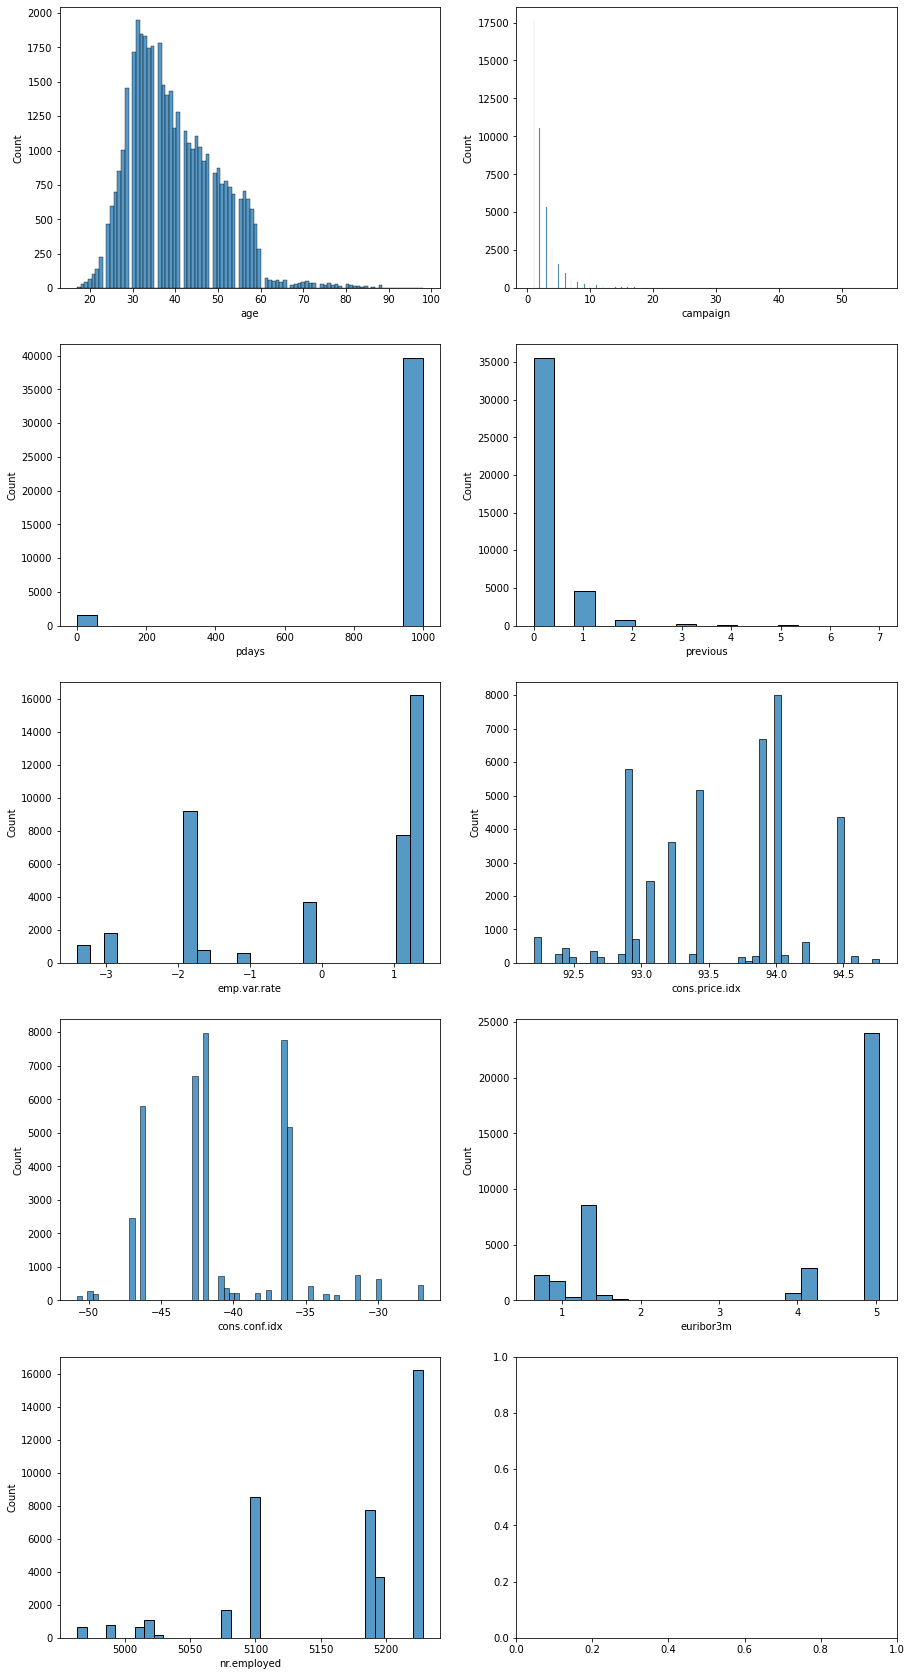

In [10]:
def distributionPlots(df, numeric_columns):
    fig, axes =plt.subplots(5,2, figsize=(15,30))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(numeric_columns):
            sns.histplot(data = df, x = numeric_columns[i], ax=ax)
            i+=1

distributionPlots(bank_df, numeric_df.values)


Observaciones:
*   Ninguna variable presenta una distribución normal marcada.
*   Preferimos no tratar outliers debido a que las variables numéricas no presentan distribución normal.






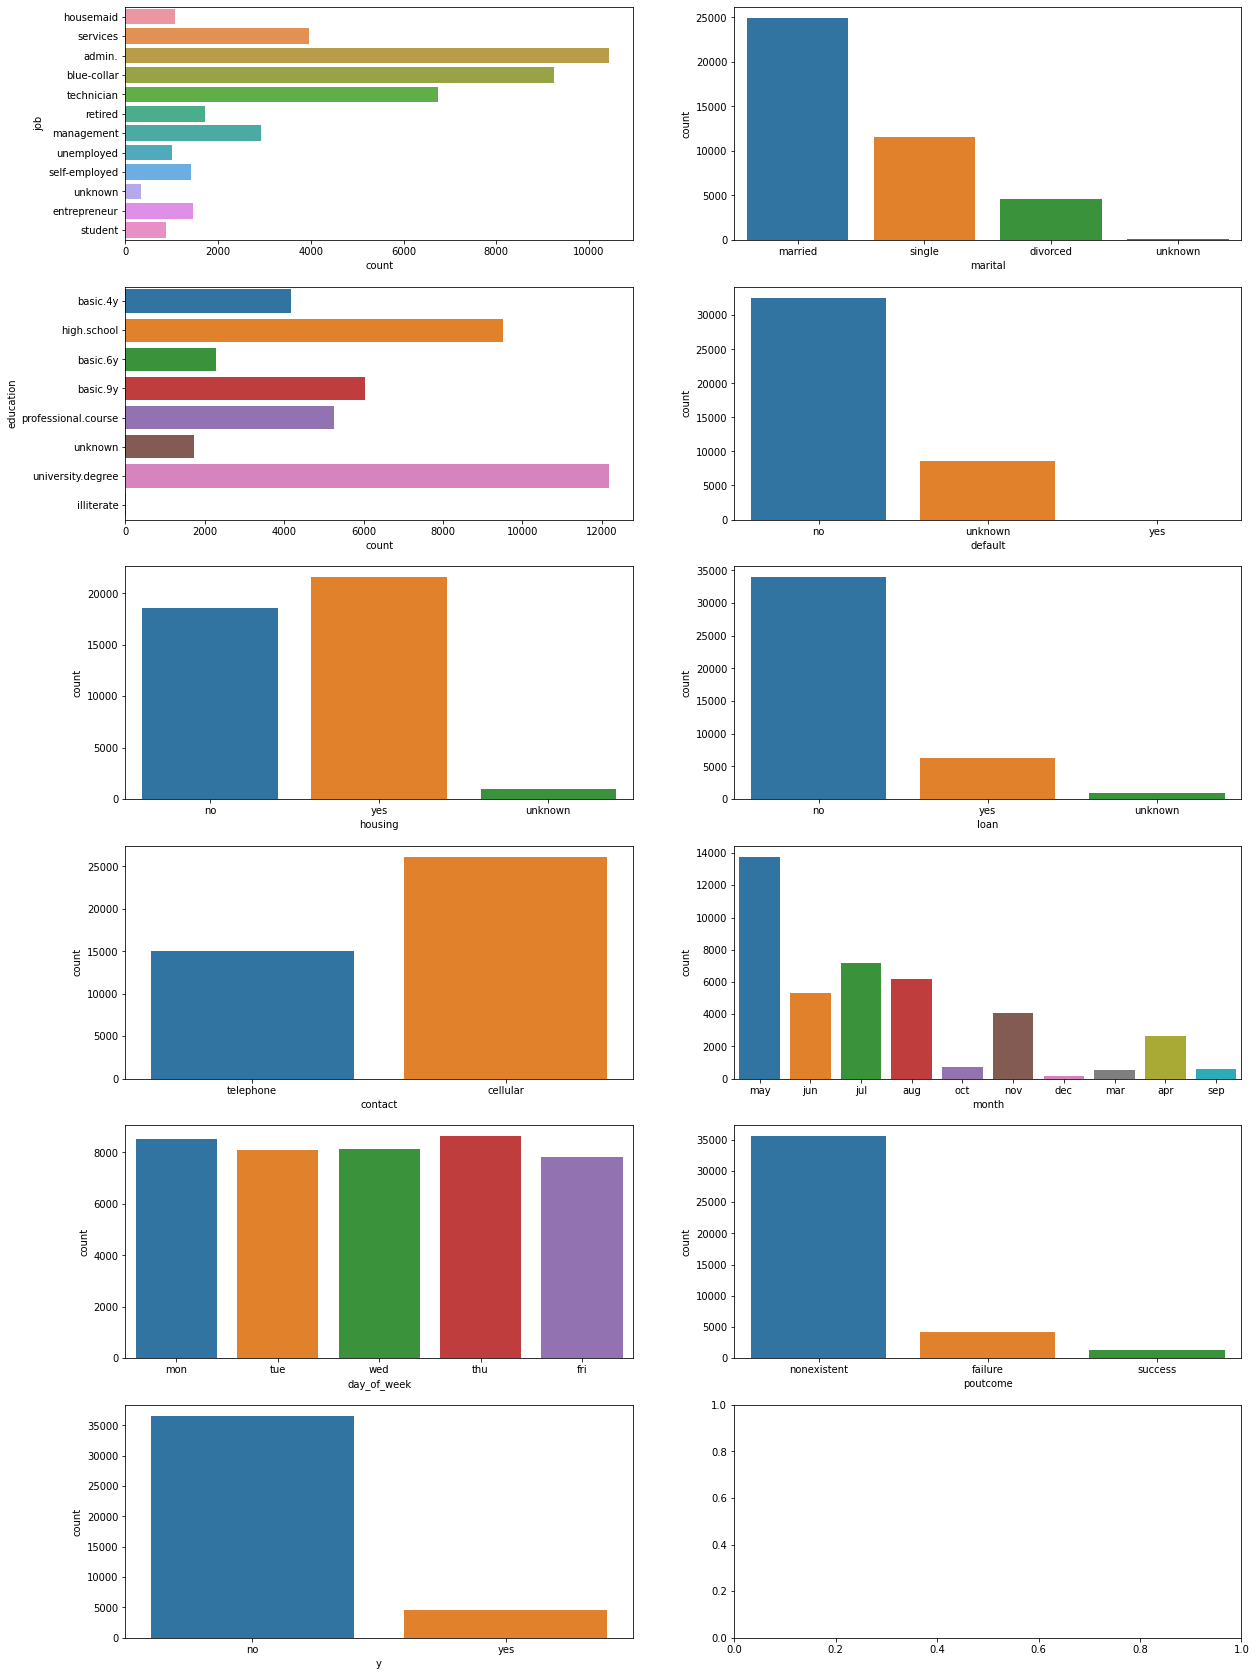

In [79]:
def countPlots(df, column_names):
    fig, axes =plt.subplots(6,2, figsize=(20,30))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(column_names):
            
            if i == 0 or i==2:
              sns.countplot(y = column_names[i],
                          data = df, ax=ax)
            else:
              sns.countplot(x = column_names[i],
                          data = df, ax=ax)

            i+=1

countPlots(bank_df, categorical_df.values)

## Valores unicos/cardinalidad
de las variables categoricas

In [13]:
for i in categorical_df.values:
    print(i, bank_df[i].unique(), len(bank_df[i].unique()))

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 12
marital ['married' 'single' 'divorced' 'unknown'] 4
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 8
default ['no' 'unknown' 'yes'] 3
housing ['no' 'yes' 'unknown'] 3
loan ['no' 'yes' 'unknown'] 3
contact ['telephone' 'cellular'] 2
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 10
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri'] 5
poutcome ['nonexistent' 'failure' 'success'] 3
y ['no' 'yes'] 2


In [14]:
for i in numeric_df:
    print(i, bank_df[i].unique(), len(bank_df[i].unique()))

age [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 78
campaign [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43] 42
pdays [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20] 27
previous [0 1 2 3 4 5 6 7] 8
emp.var.rate [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1] 10
cons.price.idx [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767] 26
cons.conf.idx [-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8] 26
euribor3m [4.85

### Variable de salida
existe un desbalanceo del dataset

In [15]:
print(bank_df[bank_df['y'] == 'yes'].shape)
print(bank_df[bank_df['y'] == 'no'].shape)

(4640, 20)
(36548, 20)


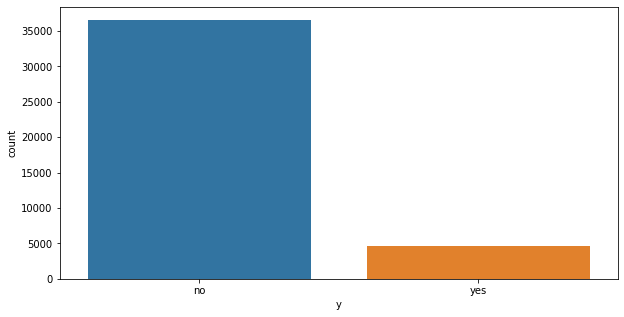

In [16]:
fig,axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x ='y', data = bank_df, ax=axes)

Relaciones entre las variables



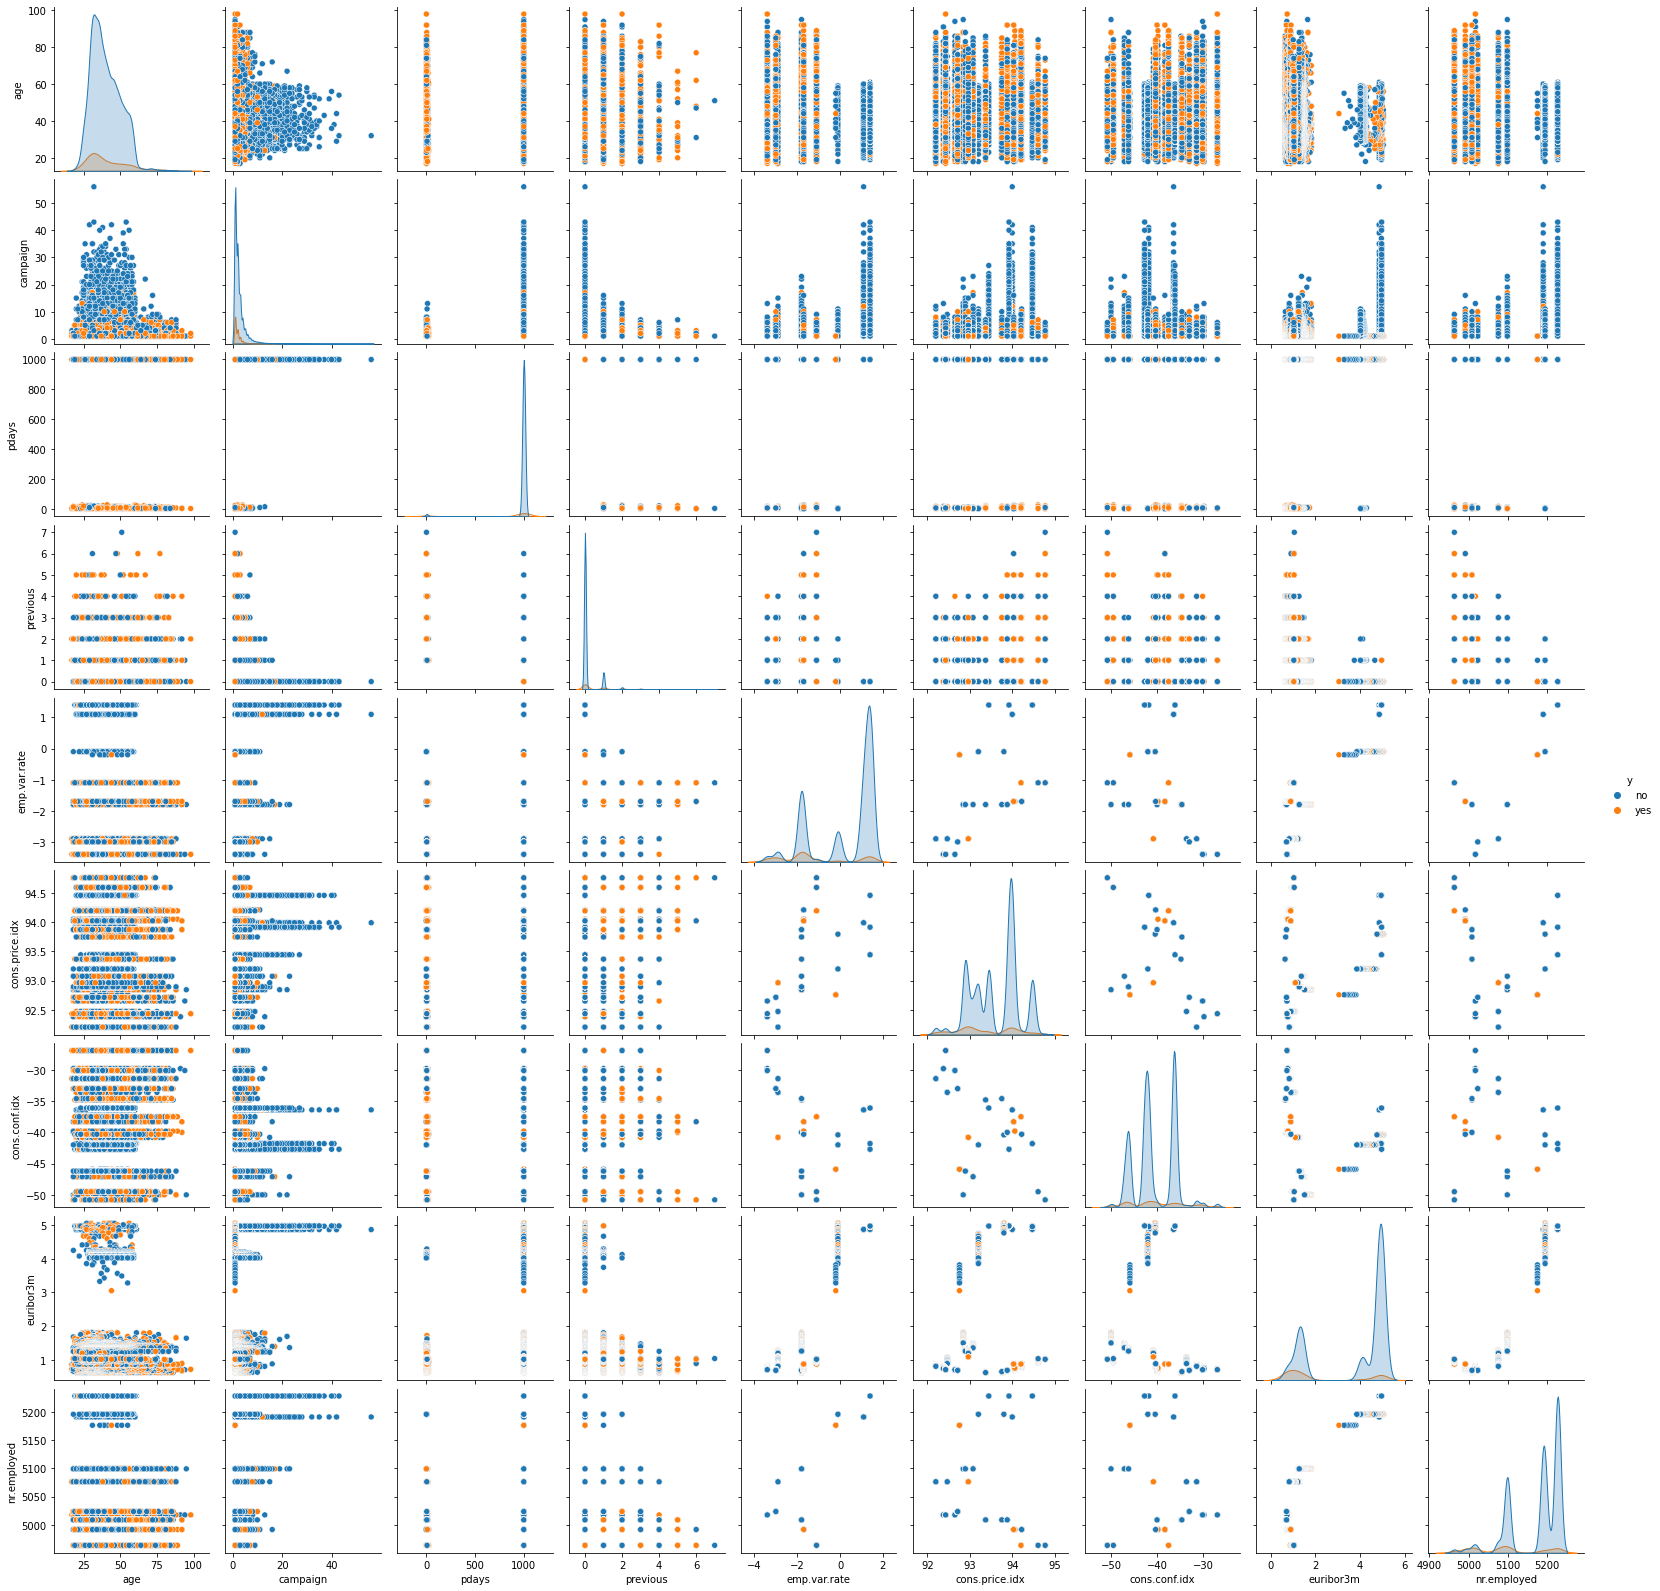

In [13]:
sns.pairplot(bank_df[['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']],hue='y')

* No se observan relaciones marcadas entre las variables numericas y la variable dependiente

Distribuciones de variables independientes separado por variable objetivo.

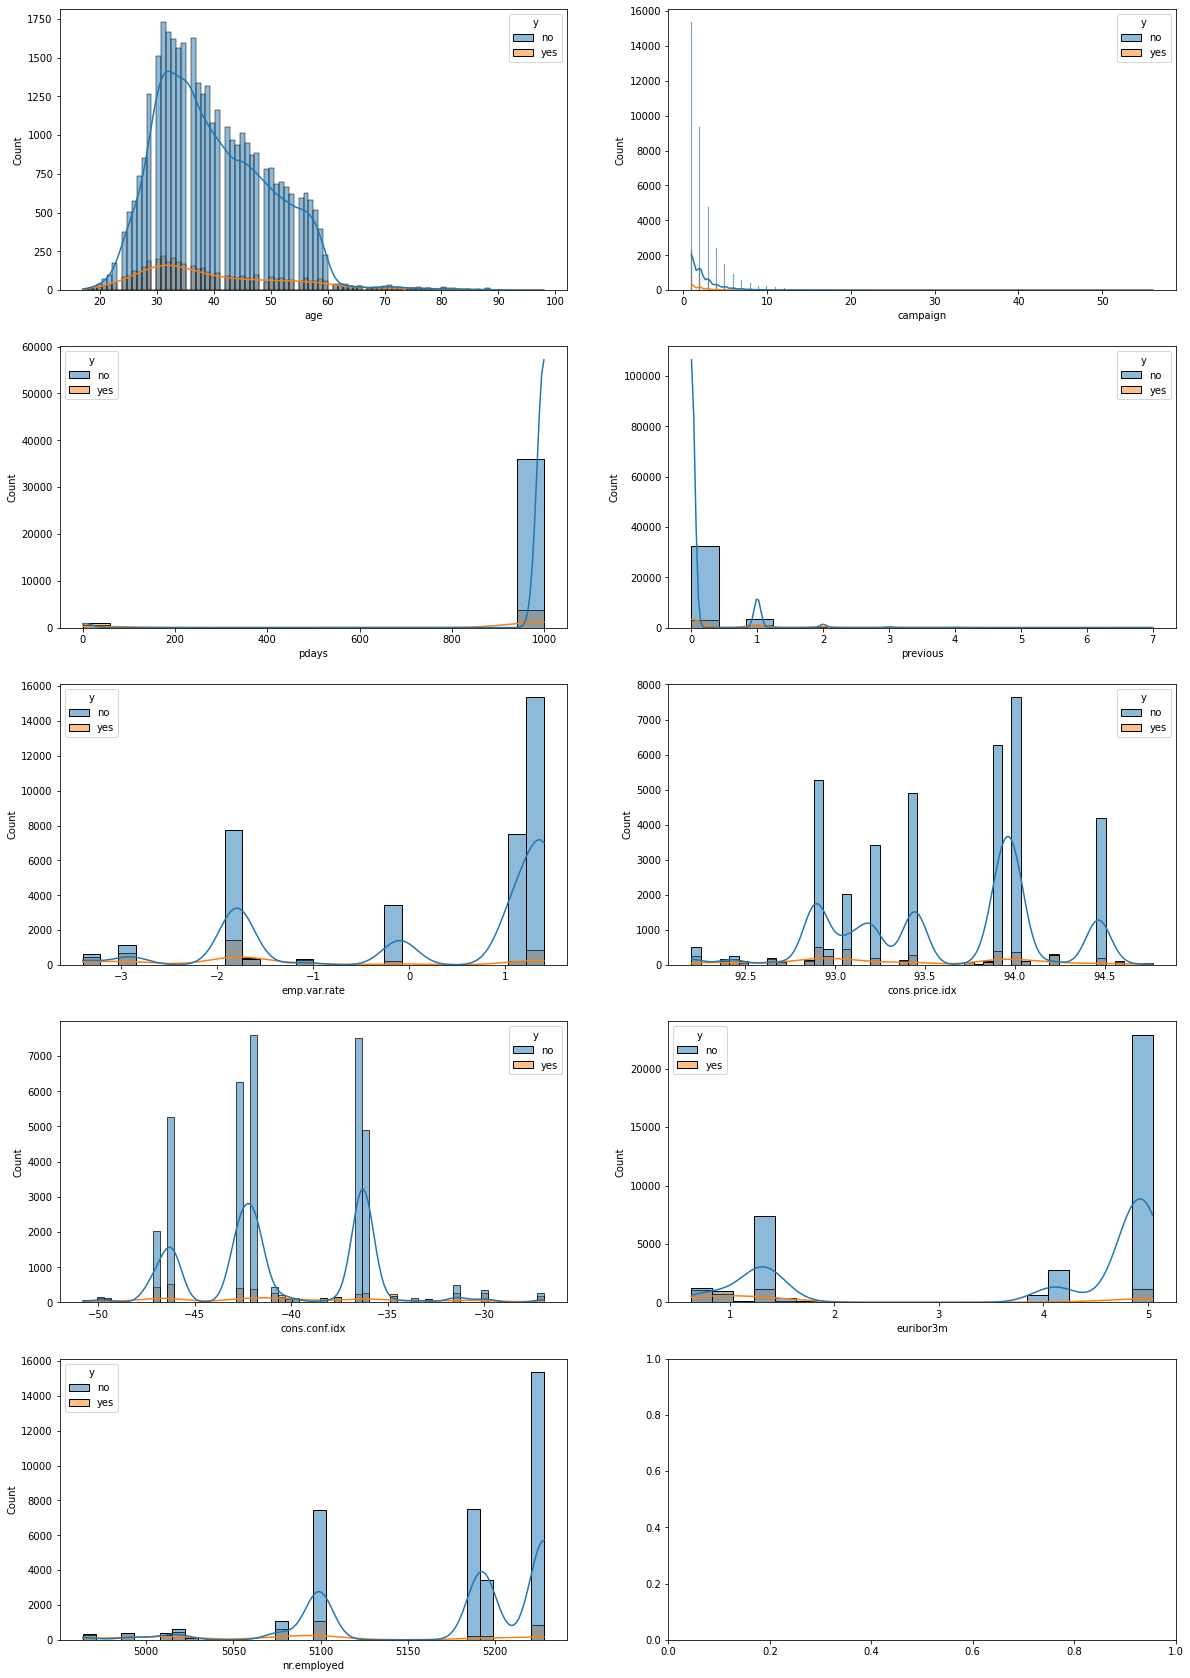

In [75]:
fig,axes = plt.subplots(5,2,figsize=(20,30))

sns.histplot(x="age", data=bank_df, hue='y', ax=axes[0,0], kde=True)
sns.histplot(x="campaign", data=bank_df, hue='y', ax=axes[0,1], kde=True)
sns.histplot(x="pdays", data=bank_df, hue='y', ax=axes[1,0], kde=True)
sns.histplot(x="previous", data=bank_df, hue='y', ax=axes[1,1], kde=True)
sns.histplot(x="emp.var.rate", data=bank_df, hue='y', ax=axes[2,0], kde=True)
sns.histplot(x="cons.price.idx", data=bank_df, hue='y', ax=axes[2,1], kde=True)
sns.histplot(x="cons.conf.idx", data=bank_df, hue='y', ax=axes[3,0], kde=True)
sns.histplot(x="euribor3m", data=bank_df, hue='y', ax=axes[3,1], kde=True)
sns.histplot(x="nr.employed", data=bank_df, hue='y', ax=axes[4,0], kde=True)

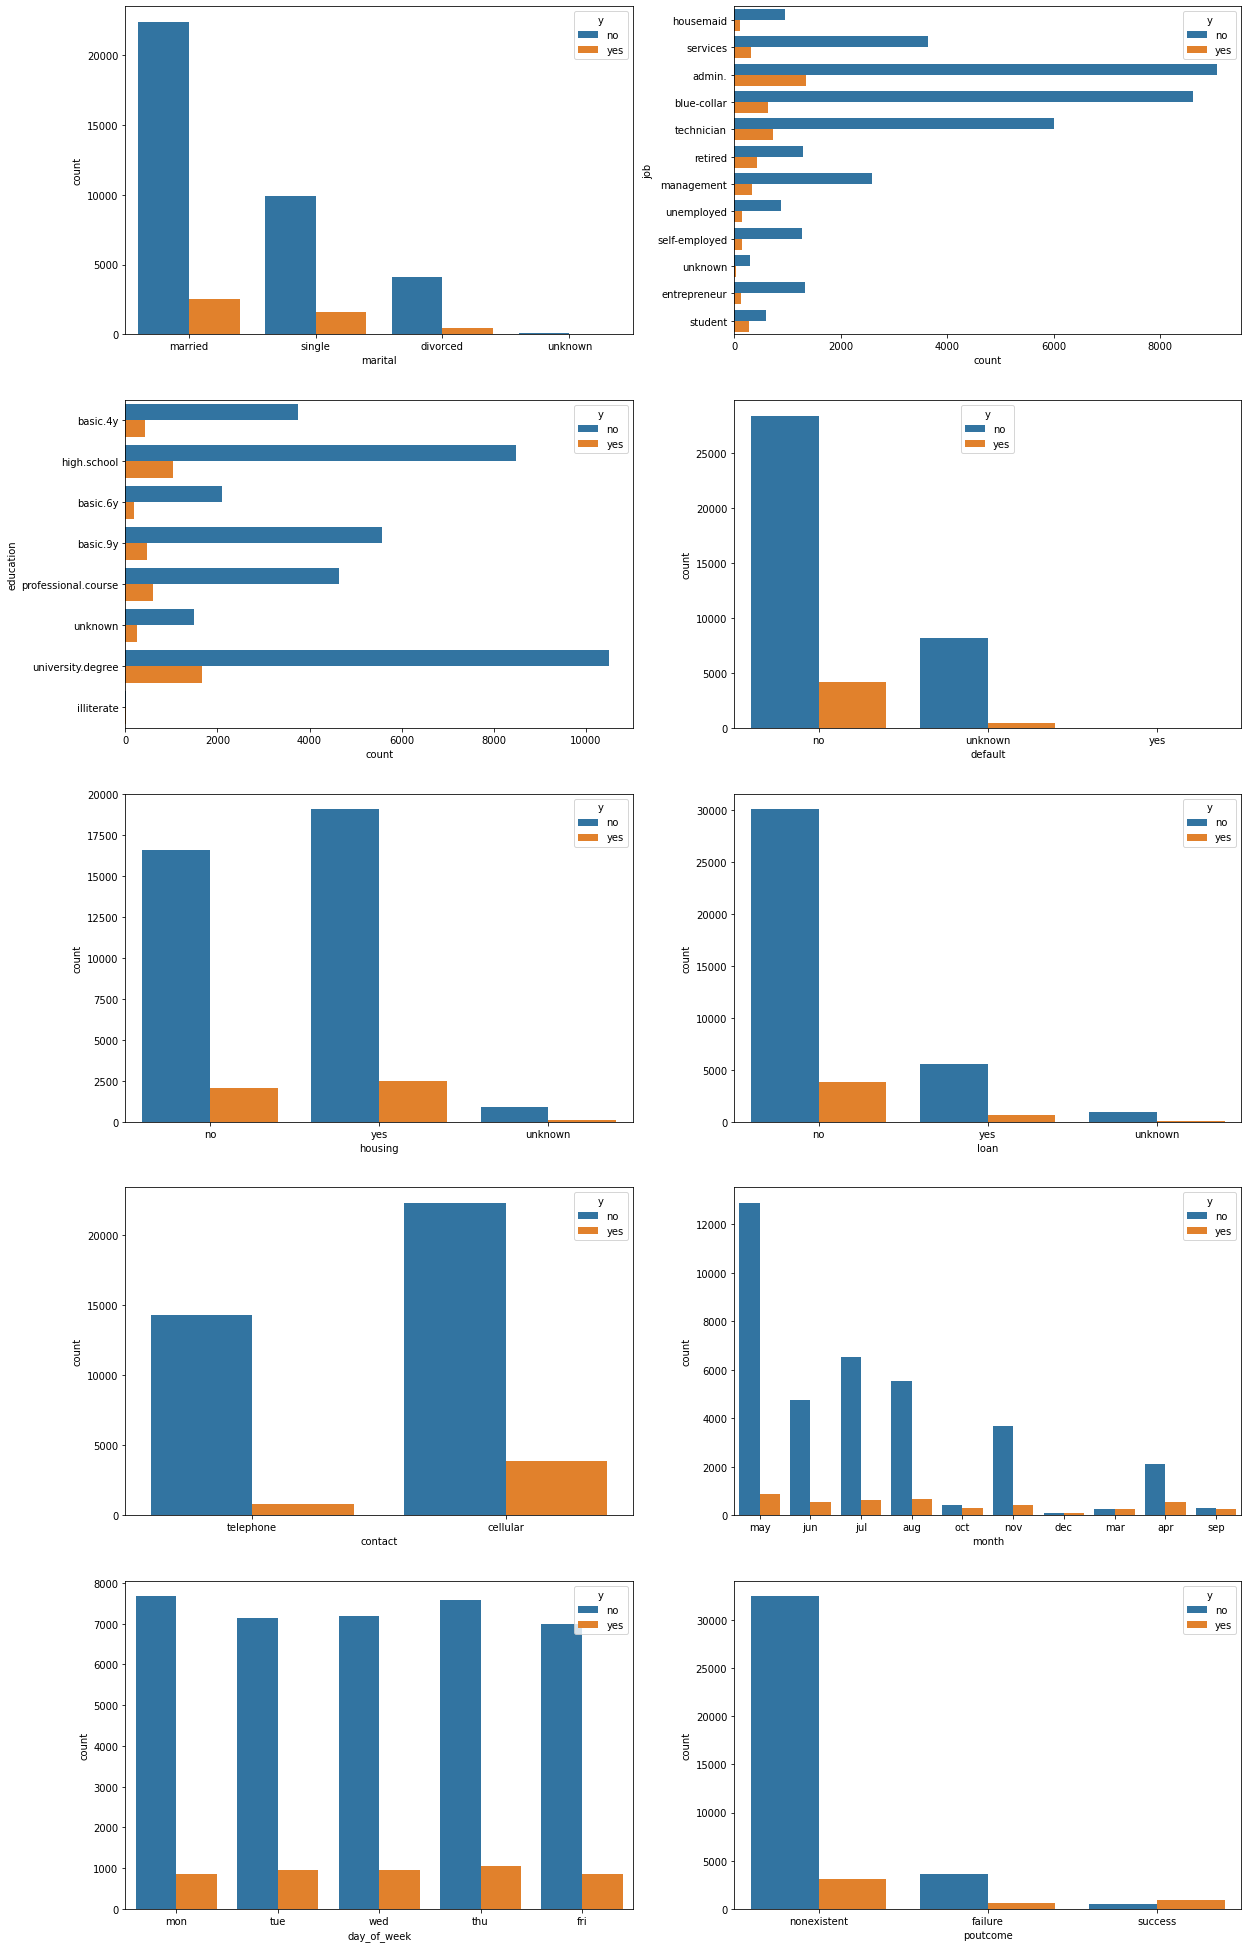

In [69]:
fig,axes = plt.subplots(5,2,figsize=(20,35))

sns.countplot(x ='marital' , hue = 'y', data = bank_df, ax=axes[0,0])
sns.countplot(y ='job' , hue = 'y', data = bank_df, ax=axes[0,1])
sns.countplot(y ='education' , hue = 'y', data = bank_df, ax=axes[1,0])
sns.countplot(x ='default' , hue = 'y', data = bank_df, ax=axes[1,1])
sns.countplot(x ='housing' , hue = 'y', data = bank_df, ax=axes[2,0])
sns.countplot(x ='loan' , hue = 'y', data = bank_df, ax=axes[2,1])
sns.countplot(x ='contact' , hue = 'y', data = bank_df, ax=axes[3,0])
sns.countplot(x ='month' , hue = 'y', data = bank_df, ax=axes[3,1])
sns.countplot(x ='day_of_week' , hue = 'y', data = bank_df, ax=axes[4,0])
sns.countplot(x ='poutcome' , hue = 'y', data = bank_df, ax=axes[4,1])

* No se observa alguna clara diferencia en las distribuciones con respecto a la variable objetivo, la diferencia se encuentra en la amplitud debido a que existen mas observaciones cuando y="no"

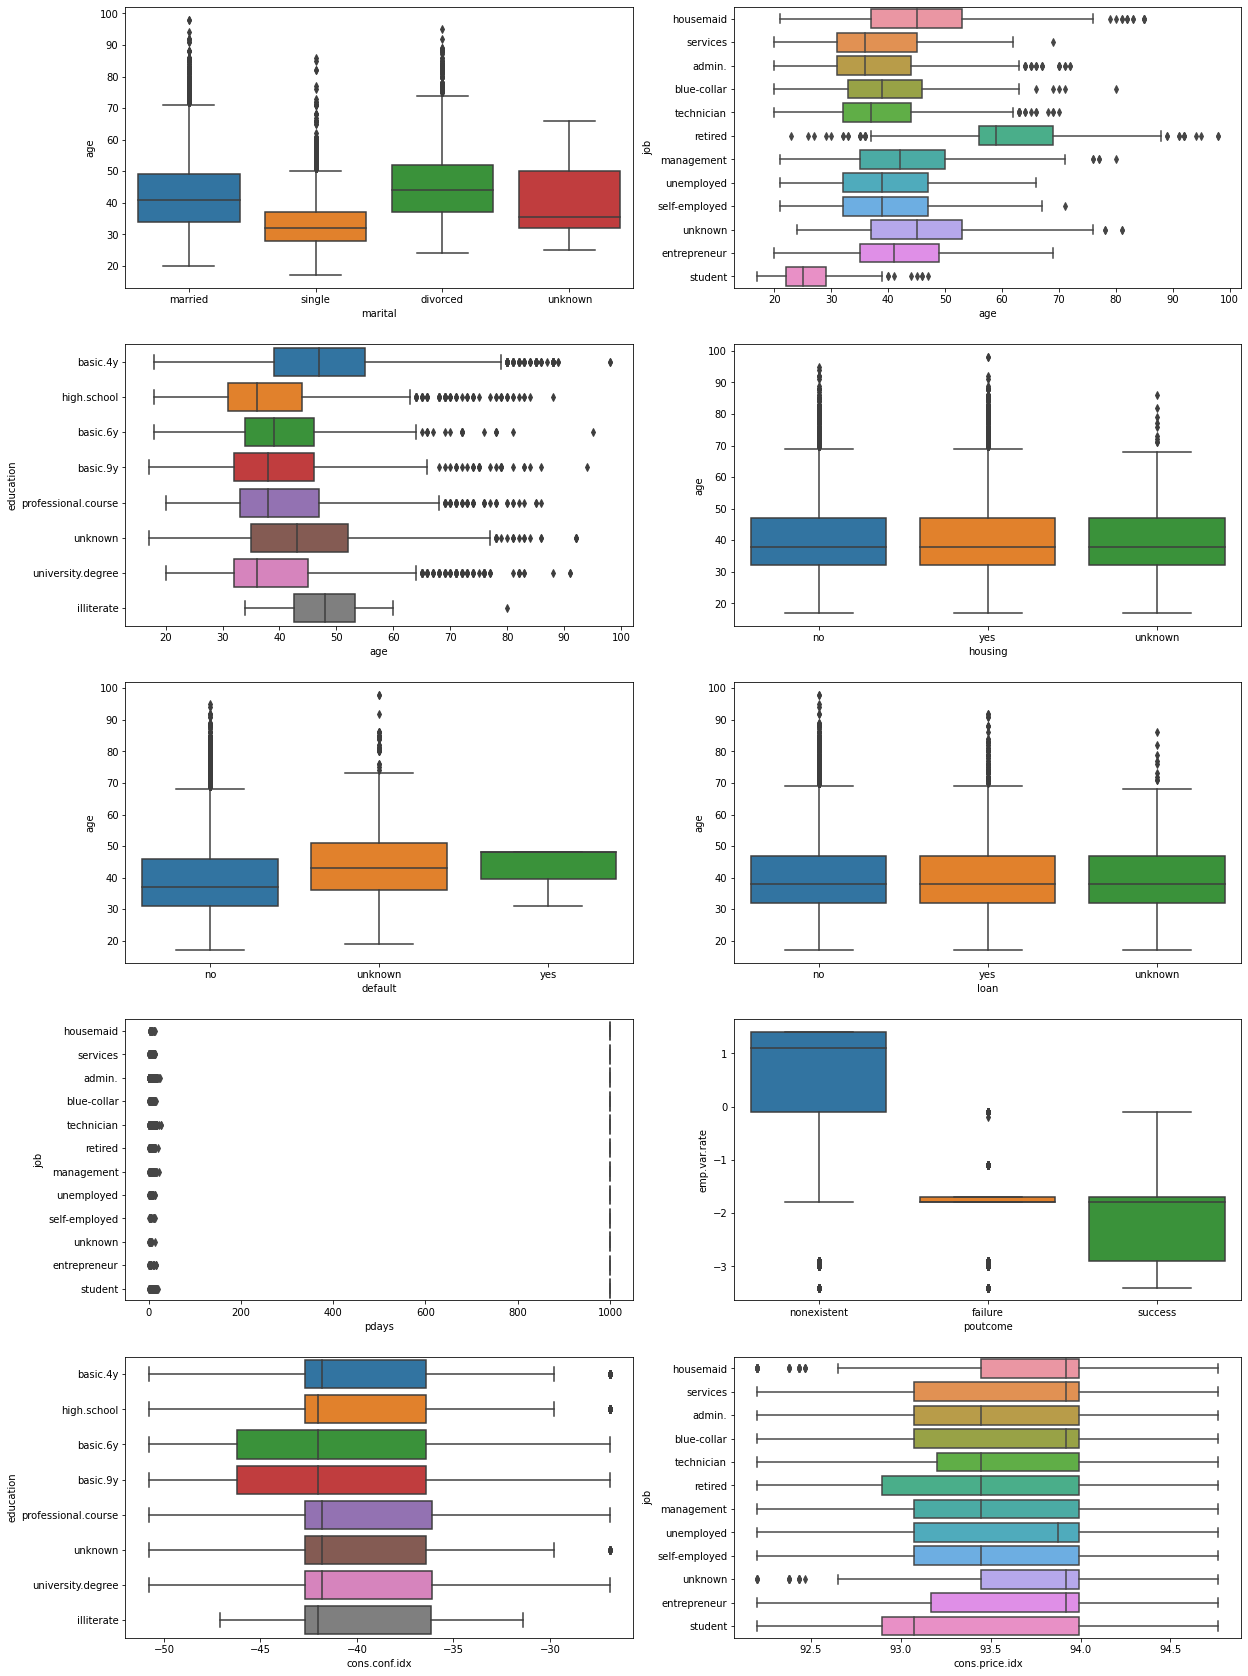

In [100]:
fig,axes = plt.subplots(5,2,figsize=(20,30))
sns.boxplot(y="age",
            x="marital",
            data=bank_df, ax=axes[0,0])

sns.boxplot(x="age",
            y="job",
            data=bank_df, ax=axes[0,1])

sns.boxplot(x="age",
            y="education",
            data=bank_df, ax=axes[1,0])

sns.boxplot(y="age",
            x="housing",
            data=bank_df, ax=axes[1,1])

sns.boxplot(y="age",
            x="default",
            data=bank_df, ax=axes[2,0])

sns.boxplot(y="age",
            x="loan",
            data=bank_df, ax=axes[2,1])

sns.boxplot(x="pdays",
            y="job",
            data=bank_df, ax=axes[3,0])

sns.boxplot(y="emp.var.rate",
            x="poutcome",
            data=bank_df, ax=axes[3,1])

sns.boxplot(x="cons.conf.idx",
            y="education",
            data=bank_df, ax=axes[4,0])

sns.boxplot(x="cons.price.idx",
            y="job",
            data=bank_df, ax=axes[4,1])

## Ingeniería de features

### Imputación de Valores faltantes
En este dataset no tenemos nulos, por lo tanto, no se realiza inputacion.

### Codificacion de variables categoricas
* One-hot encoding para las variables categoricas

funciones utiles:

In [101]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

# A class to select numerical or categorical columns
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]


variable de salida:

In [103]:
bank_df.loc[:, 'y'] = bank_df['y'].replace(('yes', 'no'), (1, 0))

variables independientes

In [104]:
# encoding categorical
dummy_enc = OneHotEncoder()
feature_arr  = dummy_enc.fit_transform(bank_df[categorical_df.drop('y').values.tolist()]).toarray()

column_list = []
prefix = categorical_df.drop('y').values.tolist()
j=0
for i in dummy_enc.categories_:
    column_list +=[str(prefix[j]) + "_" + str(s) for s in i.tolist()[0:]]
    j+=1


features = pd.DataFrame(feature_arr, columns=column_list)
bank_df_2 = pd.concat([bank_df, features], axis=1)


In [105]:
bank_df_n = bank_df_2.drop(columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'])

## Correlaciones
* correlacion de pearson y spearman
* analisis de informacion mutua.

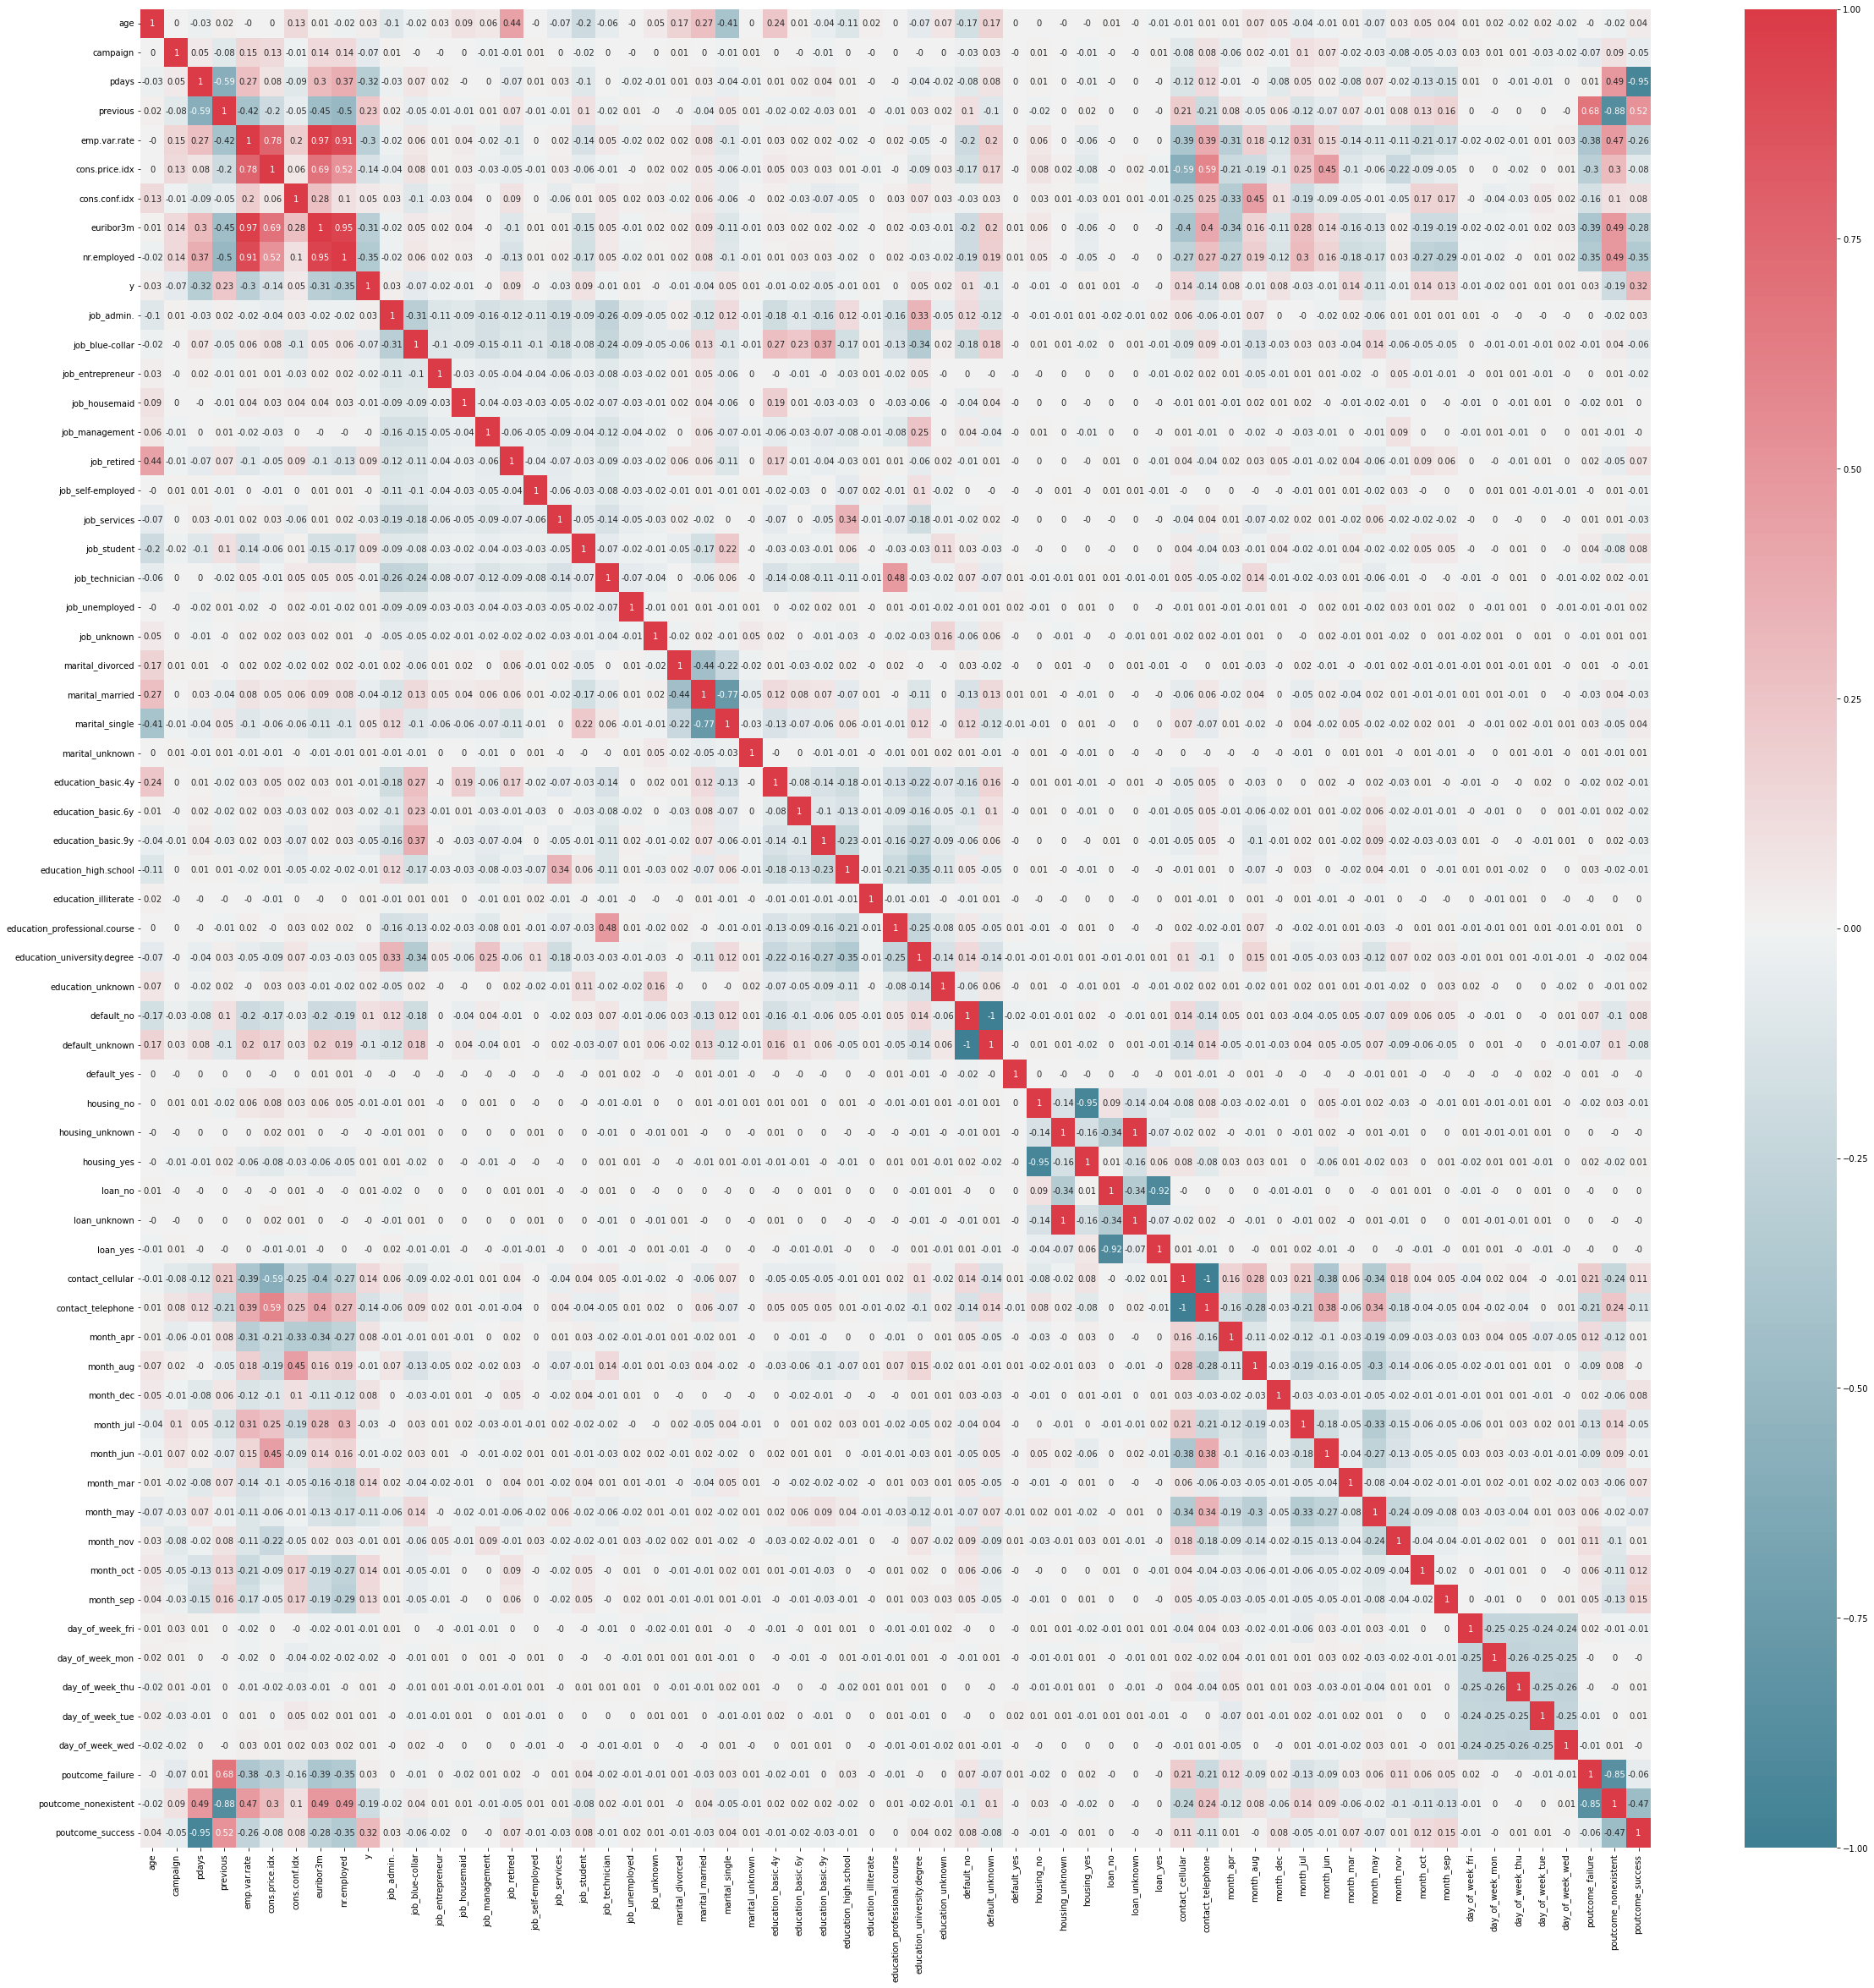

In [106]:
correlation_matrix = bank_df_n.corr().round(2)
fig,axes = plt.subplots(1,1,figsize=(40,40))
sns.heatmap(data=correlation_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True,ax=axes)
fig.savefig('corr_class_pearson.png', dpi=300)

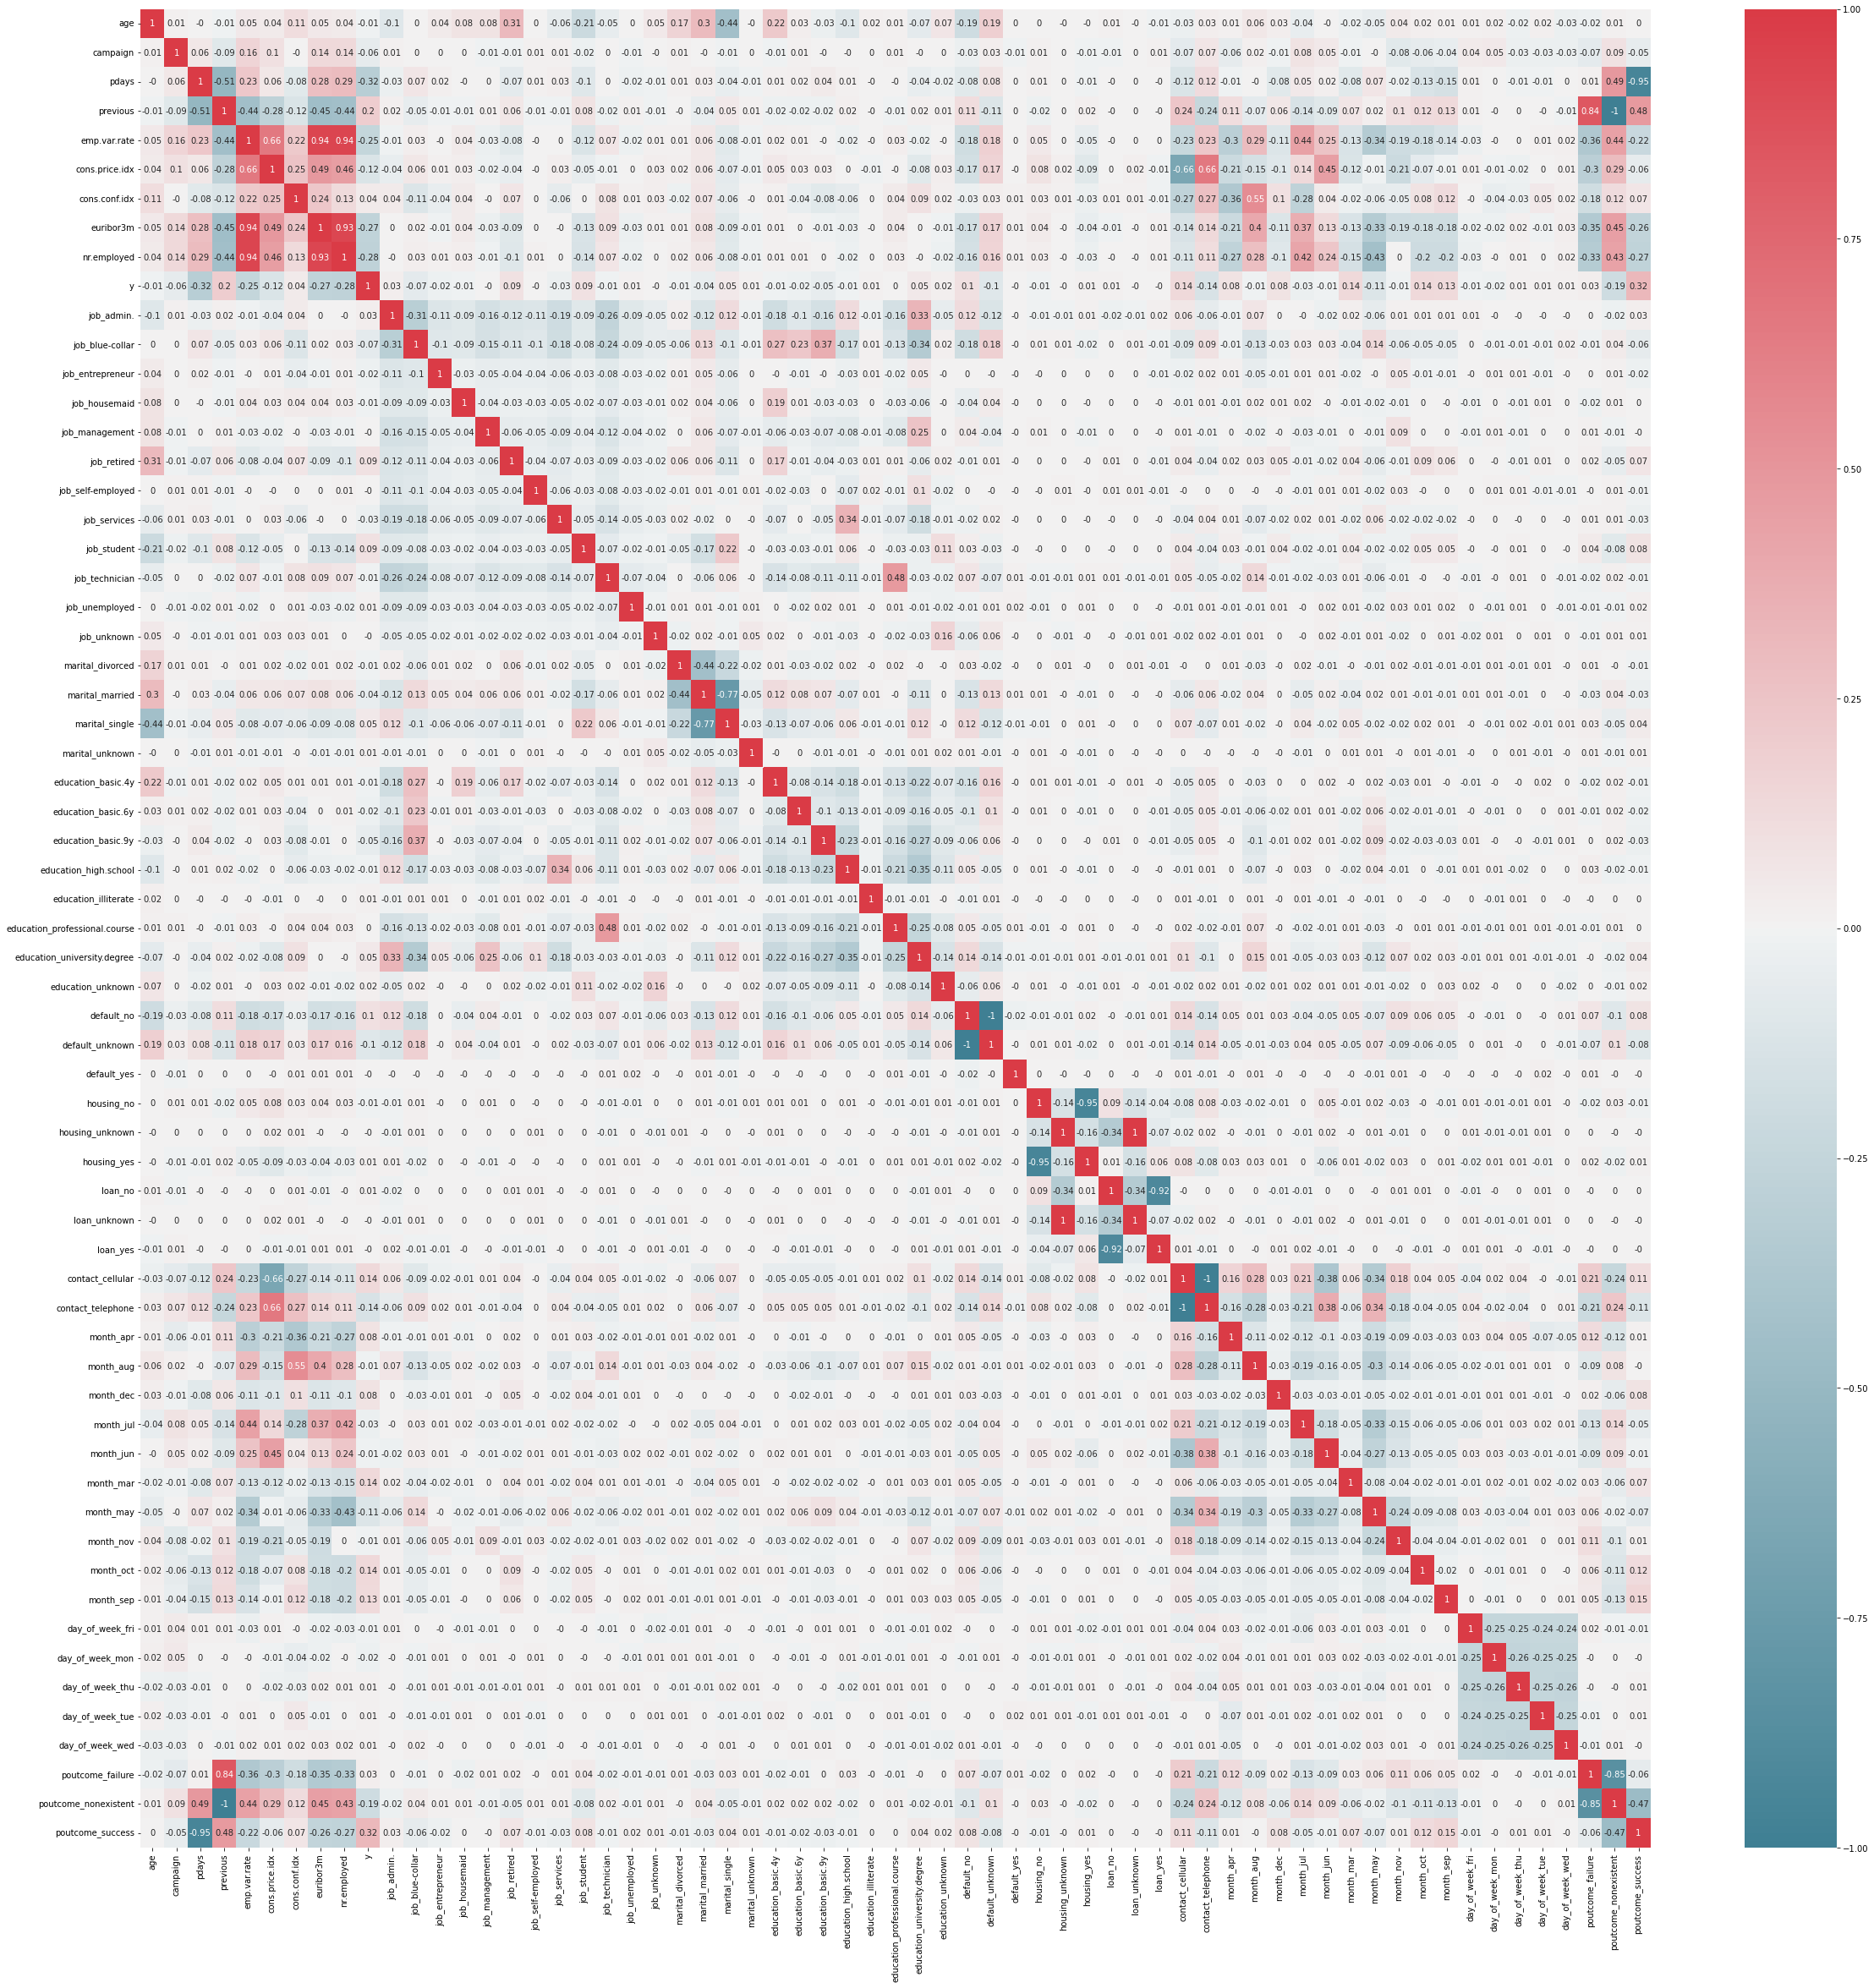

In [144]:
correlation_matrix = bank_df_n.corr(method='spearman').round(2)
fig,axes = plt.subplots(1,1,figsize=(40,40))
sns.heatmap(data=correlation_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True,ax=axes)
fig.savefig('corr_class_spearman.png', dpi=300)

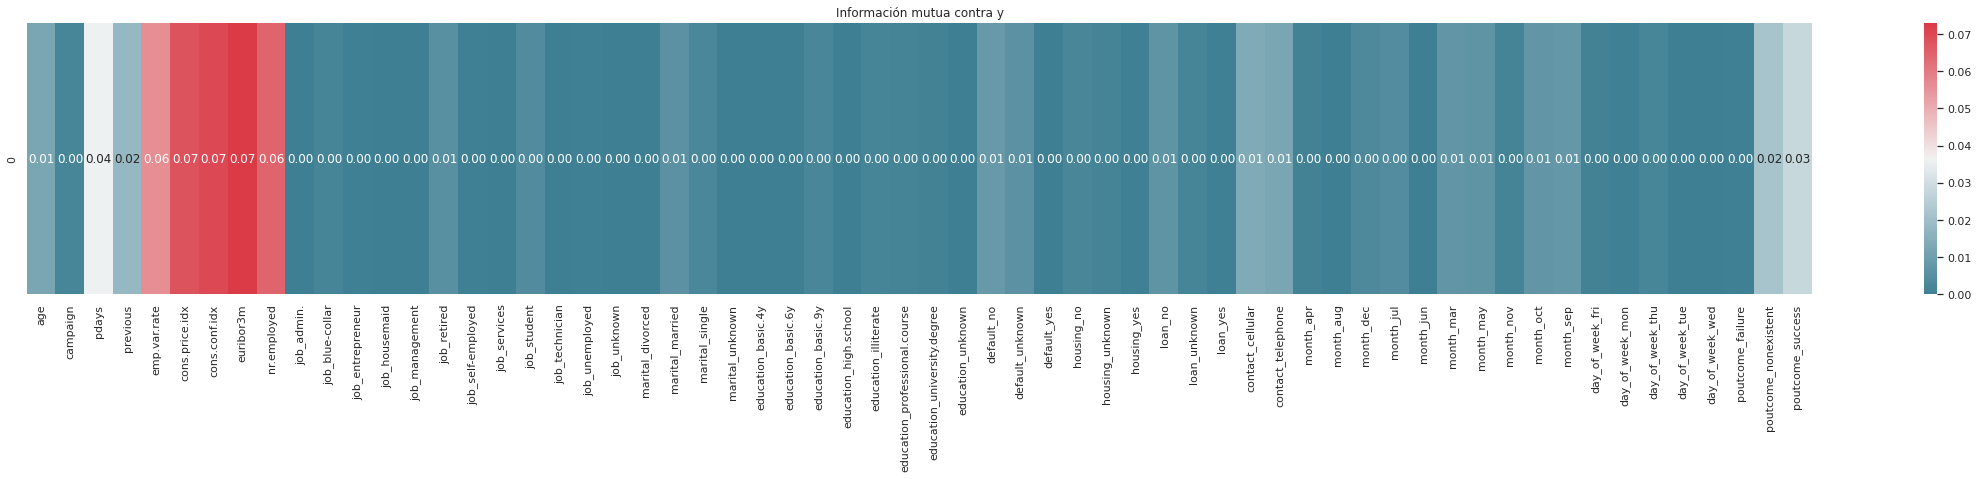

In [126]:
MI = mutual_info_classif(bank_df_n.drop(columns=['y']), bank_df_2['y'].to_numpy())
fig, ax = plt.subplots(1,1, figsize=(40,5))
ax.set_title('Información mutua contra y')
sns.heatmap([MI],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax.set_xticklabels(bank_df_n.drop(columns=['y']).columns.values.tolist())
ax.tick_params(axis='x', rotation=90)

## Seleccion de features

In [128]:
X = bank_df_n.drop(columns=['y'])
y = bank_df_n['y']

In [137]:
print(X.values.shape)
bank_df_n.shape

(41188, 62)


(41188, 63)

eliminar variables con poca varianza

In [142]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01) # Variance threshold 
sel = selector.fit(X)
sel_index = sel.get_support()
df_norm_vt = X.iloc[:, sel_index]
print(df_norm_vt.columns)
print(df_norm_vt.columns.shape)

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_

seleccion por informacion mutua

In [143]:
from sklearn.feature_selection import mutual_info_classif
threshold = 40  # the number of most relevant features
high_score_features = []
feature_scores = mutual_info_classif(X, y, random_state=0)
for score, f_name in sorted(zip(feature_scores, X.columns), reverse=True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)
df_norm_mic = X[high_score_features]
print(df_norm_mic.columns)
print(df_norm_mic.columns.shape)

euribor3m 0.07458855082062144
cons.conf.idx 0.07061981978080345
cons.price.idx 0.06879618503554585
nr.employed 0.06533325183113448
emp.var.rate 0.05552772804427719
pdays 0.03710162140012718
poutcome_success 0.027938162130925814
previous 0.022327838712176362
poutcome_nonexistent 0.020207297021376025
contact_cellular 0.013691185991474342
contact_telephone 0.01218433929401841
default_no 0.010758002481481732
age 0.010694697394846076
default_unknown 0.008571113779013206
month_may 0.006401204052610243
loan_no 0.005097390517552647
month_oct 0.0046521555646965584
job_blue-collar 0.004569872751728932
campaign 0.004005282494838447
month_mar 0.0035859662188384434
housing_yes 0.0034251582016875393
marital_single 0.003256527476337867
marital_married 0.003219068517336554
housing_unknown 0.0028242366245274653
month_apr 0.0026444892830264077
education_illiterate 0.00263915449522778
housing_no 0.002630573475576492
education_university.degree 0.0024773498886156986
job_student 0.0023670704450948765
month

Tras analizar la matrix de correlacion y/o lo obtenido en los pasos anteriores, decidimos usar el siguiente conjunto de variables como variables independientes del modelo.

* Se usan todas las variables iniciales

In [ ]:
feature_selection = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']

## Esquema de validación 
tomamos 20% de los datos para test



In [149]:
test_ratio = 0.20

X_train, X_test, y_train, y_test = train_test_split(bank_df.drop(columns=['y']), bank_df['y'], test_size=test_ratio, stratify=bank_df['y'])
print("Train: ", X_train.shape,y_train.shape)
print("Test:", X_test.shape,y_test.shape)

Train:  (32950, 19) (32950,)
Test: (8238, 19) (8238,)


Revisar distribuciones:

In [150]:
for column in X_train.select_dtypes(include=['category', object]).columns.values:
    print('categórica {}, labels in train:{}, labels in test:{}'.format(column, len(X_train.dropna()[column].unique()), len(X_test.dropna()[column].unique())))

categórica job, labels in train:12, labels in test:12
categórica marital, labels in train:4, labels in test:4
categórica education, labels in train:8, labels in test:8
categórica default, labels in train:3, labels in test:3
categórica housing, labels in train:3, labels in test:3
categórica loan, labels in train:3, labels in test:3
categórica contact, labels in train:2, labels in test:2
categórica month, labels in train:10, labels in test:10
categórica day_of_week, labels in train:5, labels in test:5
categórica poutcome, labels in train:3, labels in test:3


In [151]:
print("y_train proporcion: ", y_train.value_counts()[0]/y_train.value_counts()[1])
print("y_test proporcion: ", y_test.value_counts()[0]/y_test.value_counts()[1])

y_train proporcion:  7.876616379310345
y_test proporcion:  7.877155172413793


Text(0.5, 1.0, 'y en Train')

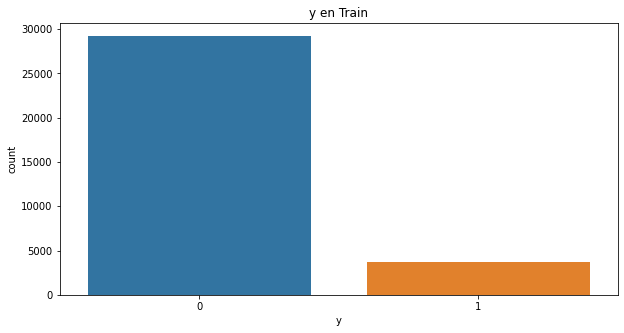

In [152]:
fig,axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x ='y', data = y_train.to_frame(), ax=axes)
axes.set_title("y en Train")

Text(0.5, 1.0, 'y en Test')

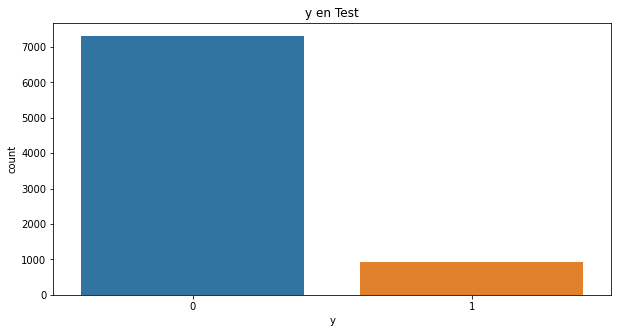

In [153]:
fig,axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x ='y', data = y_test.to_frame(), ax=axes)
axes.set_title("y en Test")

## Modelamiento

Se crean los pipelines con one-hot encoding para las varibales categoricas y estandarizacion para las variables numericas.

In [154]:
# Making pipelines
numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome'])),
    ("cat_encoder", CategoricalEncoder(encoding='onehot-dense'))
])


preprocess_pipeline = FeatureUnion(transformer_list=[
    ("numerical_pipeline", numerical_pipeline),
    ("categorical_pipeline", categorical_pipeline),
])

In [155]:
X_train_norm = preprocess_pipeline.fit_transform(X_train)
X_test_norm = preprocess_pipeline.transform(X_test)

### Modelo base

In [165]:
class RandomModel(object):

    def fit(self, XX, y):
        return None

    def predict(self, XX):
        return np.random.randint(0,1, size=XX.shape[0])

In [166]:
random_model = RandomModel()
random_model.fit(X_train_norm, y_train.values)

rm_predictions_proba = random_model.predict(X_test_norm)

ROC-AUC: 0.5


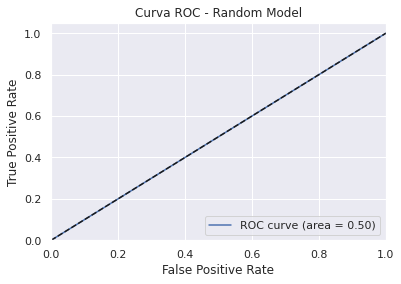

In [152]:
fpr, tpr, thresholds = metrics.roc_curve(y_test.values, rm_predictions_proba)
roc_auc = metrics.auc(fpr, tpr)
print("ROC-AUC: " + str(roc_auc))

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Model')
plt.legend(loc="lower right")
plt.show()

### Regresion logistica

ROC-AUC:  0.7901435504033208
0.8973051711580481


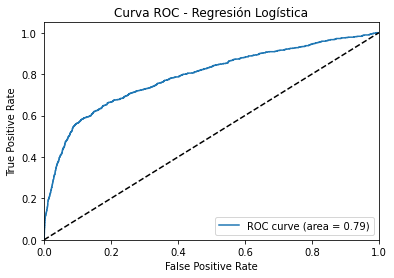

In [167]:
lg = LogisticRegression(C=0.1, penalty='l1', fit_intercept=True, solver='saga', max_iter=1000)
lg.fit(X_train_norm, y_train.values)

y_test_predict = lg.predict_proba(X_test_norm)

fpr, tpr, thresholds = metrics.roc_curve(y_test.values, y_test_predict[:,1].ravel())
roc_auc = metrics.auc(fpr, tpr)
print("ROC-AUC: ", metrics.auc(fpr, tpr))
print(metrics.accuracy_score(y_test.values, lg.predict(X_test_norm)))
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.show()


### Random Forest

ROC-AUC:  0.7603362776546064


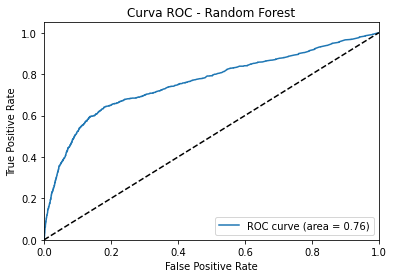

In [169]:
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=0)
rf_model.fit(X_train_norm, y_train.values)

rf_valid_pred = rf_model.predict_proba(X_test_norm)
fpr, tpr, thresholds = metrics.roc_curve(y_test.values, rf_valid_pred[:,1].ravel())
roc_auc = metrics.auc(fpr, tpr)
print("ROC-AUC: ", roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()


### Deep learning
* Entrenar un modelo de deep learning con un solo hidden layer y con los datos normalizados.


In [165]:
tf.test.gpu_device_name()

''

In [166]:
tf.config.list_physical_devices('GPU') 

[]

In [170]:
def create_model():
  # create model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(100))
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dense(1))
  model.add(tf.keras.layers.Activation('sigmoid'))

  return model

model = create_model()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC()]
)

model.fit(
    X_train_norm.astype(np.float32), 
    y_train.values.astype(np.float32),
    epochs=10,
    batch_size=64,
    validation_data=(X_test_norm, y_test.values),
)


Epoch 1/10
515/515 [==============================] - 3s 3ms/step - loss: 0.2850 - auc: 0.7796 - val_loss: 0.2927 - val_auc: 0.7778
Epoch 2/10
515/515 [==============================] - 1s 3ms/step - loss: 0.2783 - auc: 0.7860 - val_loss: 0.2816 - val_auc: 0.7791
Epoch 3/10
515/515 [==============================] - 1s 3ms/step - loss: 0.2760 - auc: 0.7901 - val_loss: 0.2776 - val_auc: 0.7903
Epoch 4/10
515/515 [==============================] - 1s 3ms/step - loss: 0.2731 - auc: 0.7962 - val_loss: 0.2787 - val_auc: 0.7950
Epoch 5/10
515/515 [==============================] - 2s 4ms/step - loss: 0.2733 - auc: 0.7948 - val_loss: 0.2814 - val_auc: 0.7900
Epoch 6/10
515/515 [==============================] - 2s 5ms/step - loss: 0.2710 - auc: 0.7996 - val_loss: 0.2776 - val_auc: 0.7945
Epoch 7/10
515/515 [==============================] - 2s 4ms/step - loss: 0.2699 - auc: 0.8045 - val_loss: 0.2846 - val_auc: 0.7880
Epoch 8/10
515/515 [==============================] - 1s 3ms/step - loss: 0.

In [175]:
y_pred_keras = model.predict(X_test_norm, batch_size=64).ravel()

fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(y_test.values, y_pred_keras)

ROC-AUC:  0.7820375518892402


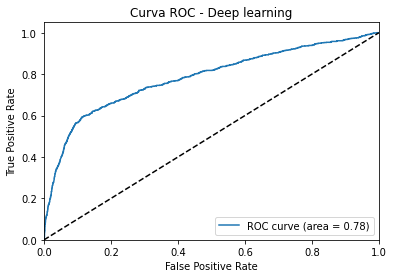

In [176]:
roc_auc = metrics.auc(fpr_keras, tpr_keras)
print("ROC-AUC: ", roc_auc)

plt.figure()
plt.plot(fpr_keras, tpr_keras, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Deep learning')
plt.legend(loc="lower right")
plt.show()

### XGboost
con optimizacion de hiperparametros

In [177]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold

In [177]:

params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5, 10]
}
#xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, n_estimators = 600)

xg_class = xgb.XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)

folds = 3
param_comb = 5

skf = KFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xg_class, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train_norm, y_train.values), verbose=3, random_state=1001 )

random_search.fit(X_train_norm, y_train.values)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f3c96aa4dd0>,
                   estimator=XGBClassifier(eval_metric='auc',
                                           grow_policy='lossguide',
                                           tree_method='hist',
                                           use_label_encoder=False),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5, 10],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='roc_auc', verbose=3)

In [178]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([4.28800019, 6.13494611, 4.64073539, 2.46644711, 3.4230566 ]), 'std_fit_time': array([0.02328654, 0.09658424, 0.07421511, 0.03675598, 0.15697202]), 'mean_score_time': array([0.17919389, 0.29880961, 0.16220236, 0.14686743, 0.1007452 ]), 'std_score_time': array([0.01547434, 0.00962554, 0.0067511 , 0.01143876, 0.01811159]), 'param_subsample': masked_array(data=[0.6, 0.8, 0.8, 1.0, 0.6],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[1, 10, 5, 1, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[4, 10, 5, 4, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.5, 1.5, 5, 1, 1.5],
             mask=[False, False, False, False, False],
       fill_value='?',
        

ROC-AUC:  0.7940952403415256


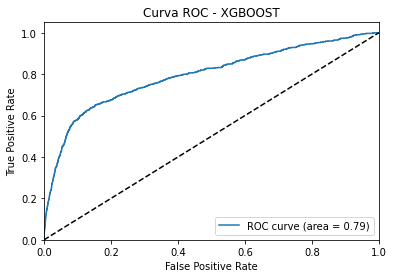

In [178]:
xg_clas = xgb.XGBClassifier(colsample_bytree=0.8, eval_metric='auc', gamma=0.5,
              grow_policy='lossguide', max_depth=4, subsample=0.6,
              tree_method='hist', use_label_encoder=False)

xg_clas.fit(X_train_norm, y_train.values)

y_test_predict = xg_clas.predict_proba(X_test_norm)
fpr, tpr, thresholds = metrics.roc_curve(y_test.values, y_test_predict[:, 1])
roc_auc = metrics.auc(fpr, tpr)
print("ROC-AUC: ", roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - XGBOOST')
plt.legend(loc="lower right")
plt.show()

### SVM

ROC-AUC:  0.5228407000330204
0.8973051711580481


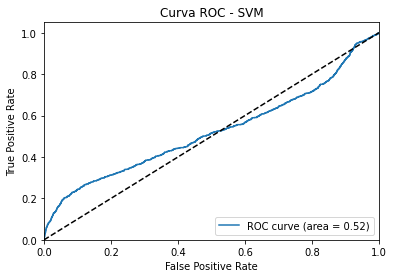

In [184]:

svclassifier = SVC(max_iter=1000, probability=True)

svclassifier.fit(X_train_norm, y_train.values)

y_test_predict = svclassifier.predict_proba(X_test_norm)

fpr, tpr, thresholds = metrics.roc_curve(y_test.values, y_test_predict[:, 1])
roc_auc = metrics.auc(fpr, tpr)
print("ROC-AUC: ", metrics.auc(fpr, tpr))
print(metrics.accuracy_score(y_test.values, lg.predict(X_test_norm)))
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - SVM')
plt.legend(loc="lower right")
plt.show()


### KNN classifier

ROC-AUC:  0.7159793062172745


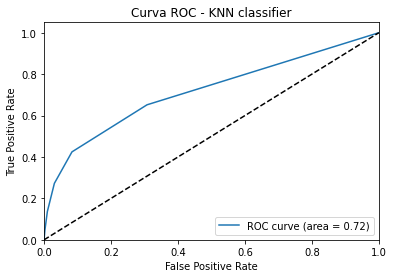

In [185]:
from sklearn.neighbors import KNeighborsClassifier

knncla = KNeighborsClassifier()

knncla.fit(X_train_norm, y_train.values)

y_test_predict = knncla.predict_proba(X_test_norm)

fpr, tpr, thresholds = metrics.roc_curve(y_test.values, y_test_predict[:, 1])
roc_auc = metrics.auc(fpr, tpr)
print("ROC-AUC: ", metrics.auc(fpr, tpr))
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - KNN classifier')
plt.legend(loc="lower right")
plt.show()

### DecisionTree classifier

ROC-AUC:  0.6230075711118449


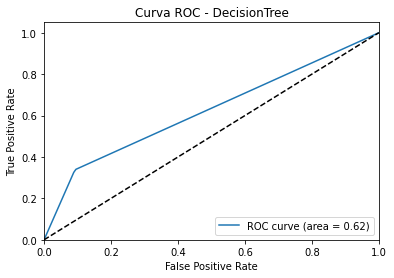

In [186]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion="entropy")

dtree.fit(X_train_norm, y_train.values)

y_test_predict = dtree.predict_proba(X_test_norm)

fpr, tpr, thresholds = metrics.roc_curve(y_test.values, y_test_predict[:, 1])
roc_auc = metrics.auc(fpr, tpr)
print("ROC-AUC: ", metrics.auc(fpr, tpr))
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - DecisionTree')
plt.legend(loc="lower right")
plt.show()


Text(0, 0.5, 'ROC-AUC')

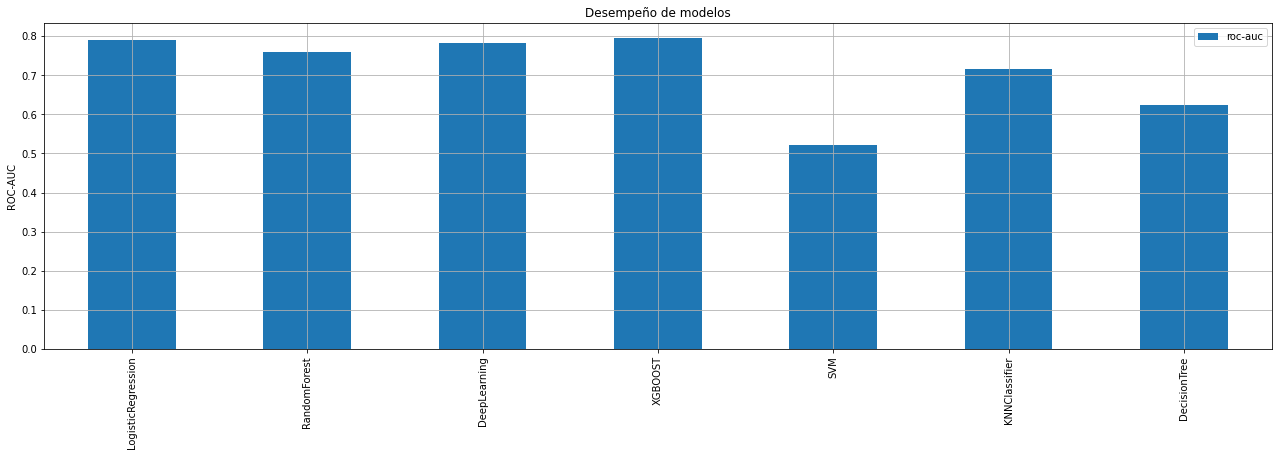

In [188]:
results = {'LogisticRegression': 0.7901435504033208, 'RandomForest': 0.7603362776546064, 'DeepLearning': 0.7820375518892402, 'XGBOOST': 0.7940952403415256,
           'SVM': 0.5228407000330204, 'KNNClassifier': 0.7159793062172745, 'DecisionTree': 0.6230075711118449}
df_results = pd.DataFrame(results, index=['roc-auc'])

axes = df_results.T.plot.bar(title="Desempeño de modelos", figsize=(22,6))
axes.grid('both')
axes.set_ylabel('ROC-AUC')

# Conclusiones
* Se uso como métrica el área bajo la curva roc, "roc-auc"
* Se obtiene el peor desempeño con SVM.
* El modelo que mejor desempeño tuvo fue el Xgboost.
* En general no se alcanzó un desempeño cercano a 1 con el dataset usado, obteniendo con regresión logística un desempeño similar a usando Xgboost.

